## Assignment Knock airport Weather
#### Gabriela Domiciano

 
 - Create a python file or notebook called assignment_6_Weather
 - Get the data from this link - " https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv "
 - Plot:
    - The temperature
    - The mean temperature each day
    - The mean temperature for each month
    - The Windspeed (there is data missing from this column)
    - The rolling windspeed (say over 24 hours)
    - The max windspeed for each day
    - The monthly mean of the daily max windspeeds

 *****************************

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### soucers: 
- https://www.geeksforgeeks.org/time-series-data-visualization-in-python/?ref=gcse_outind
- https://stackoverflow.com/questions/67087338/parsing-an-csv-file-and-plotting-with-python
- https://www.geeksforgeeks.org/how-to-deal-with-missing-values-in-a-timeseries-in-python/?ref=gcse_outind\
- https://www.geeksforgeeks.org/8-types-of-plots-for-time-series-analysis-using-python/?ref=gcse_outind

In [2]:


# URL do arquivo CSV
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# Try to load the CSV, ignoring the problematic lines at the beginning
try:
    # Sets the number of lines to skip until reaching useful data
    # Adjust the number if you need to skip more lines.
    df = pd.read_csv(url, skiprows=22, on_bad_lines='skip')  
    
    print("Data loaded successfully from the correct row!!")
    display(df.head())  # Display the first rows of the dataframe
except Exception as e:
    print(f"Erro ao ler o arquivo CSV: {e}")


Data loaded successfully from the correct row!!


/var/folders/x1/xctbwlls7xb1bbqbwvht5xgr0000gn/T/ipykernel_5957/1810378556.py:8: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=22, on_bad_lines='skip')


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


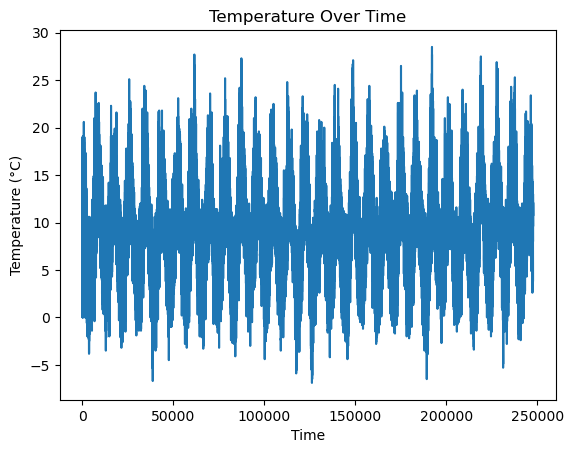

In [3]:
## Plot Temperature.

plt.plot(df['temp'])
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Over Time")
plt.savefig('plot_temperature.png')
plt.show()


In [4]:
temp_day = df[['temp', 'date']]
# Show
print(temp_day)

        temp               date
0       11.5  10-apr-1996 14:00
1       11.5  31-jul-1996 08:00
2       11.6  31-jul-1996 09:00
3       12.9  31-jul-1996 10:00
4       14.5  31-jul-1996 11:00
...      ...                ...
247669  10.1  31-oct-2024 20:00
247670  10.1  31-oct-2024 21:00
247671  10.0  31-oct-2024 22:00
247672   9.8  31-oct-2024 23:00
247673   9.7  01-nov-2024 00:00

[247674 rows x 2 columns]


/var/folders/x1/xctbwlls7xb1bbqbwvht5xgr0000gn/T/ipykernel_5957/1560950458.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


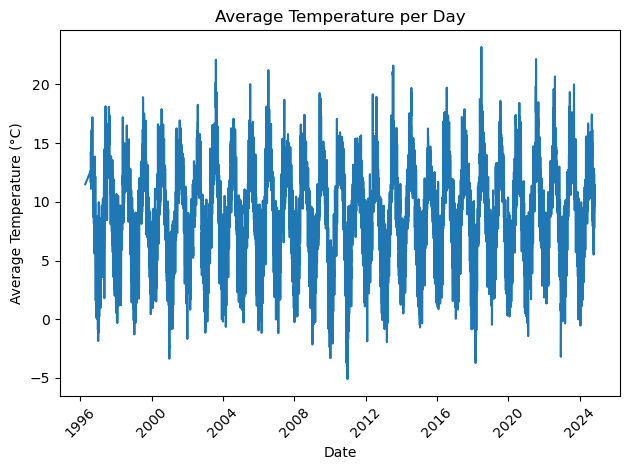

In [5]:

# Plot average temperature per day

df['date'] = pd.to_datetime(df['date'])
daily_mean = df.groupby(df['date'].dt.date)['temp'].mean()
plt.plot(daily_mean.index, daily_mean.values)
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Temperature per Day")
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts to not overlap labels
plt.savefig('plot_mean_temperature.png') 
plt.show()


/var/folders/x1/xctbwlls7xb1bbqbwvht5xgr0000gn/T/ipykernel_5957/865319400.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = df.resample('M', on='date')['temp'].mean()


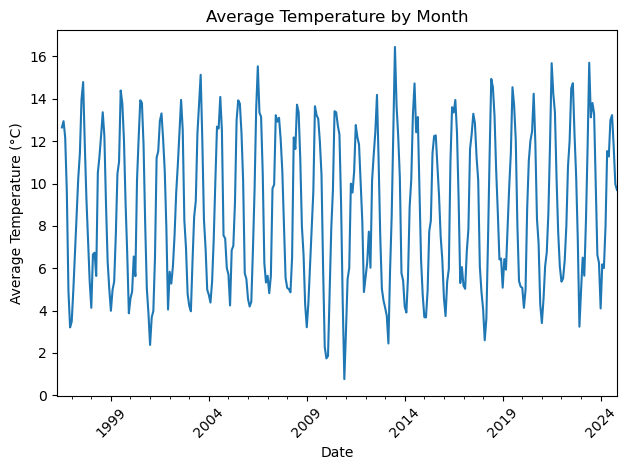

In [6]:


# Group by month and calculate the average temperature
monthly_mean = df.resample('M', on='date')['temp'].mean()

# Plot the average temperature for each month
monthly_mean.plot(title="Average Temperature by Month", ylabel="Average Temperature (°C)", xlabel="Date", rot=45)
plt.tight_layout()  # Adjustment to avoid overlapping labels
plt.savefig('plot_mean_temperature_monthly.png') 
plt.show()


In [7]:

# As we can see, it generated a false result, which means, there is no missing value in any column
missing_values = df.isna().any()
print(missing_values)

date     False
ind      False
rain     False
ind.1    False
temp     False
ind.2    False
wetb     False
dewpt    False
vappr    False
rhum     False
msl      False
ind.3    False
wdsp     False
ind.4    False
wddir    False
ww       False
w        False
sun      False
vis      False
clht     False
clamt    False
dtype: bool


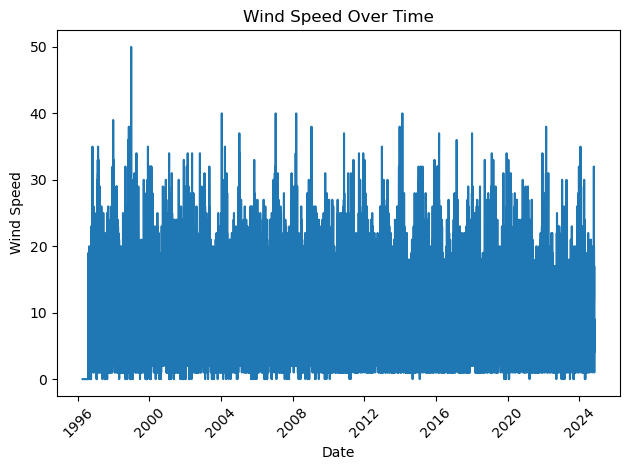

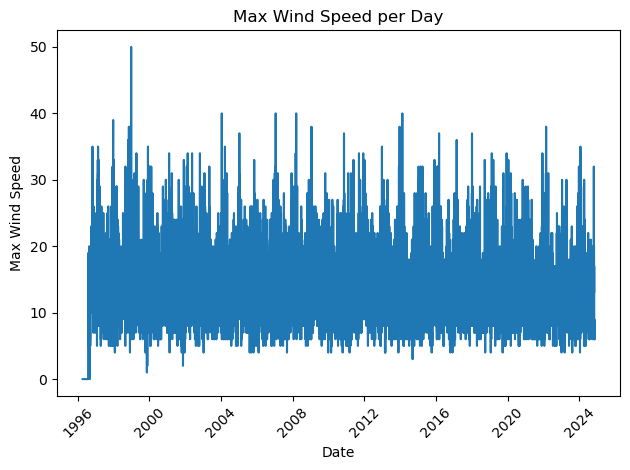

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna 'date' para o formato datetime, se ainda não estiver
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filtrar para garantir que apenas valores válidos e numéricos estejam nas colunas 'date' e 'wdsp'
df = df.dropna(subset=['date', 'wdsp'])  # Remove linhas onde 'date' ou 'wdsp' são NaN
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')  # Garante que 'wdsp' é numérico
df = df.dropna(subset=['wdsp'])  # Remove linhas onde 'wdsp' não é numérico

# Plotar a coluna 'wdsp' em relação a 'date'
plt.plot(df['date'], df['wdsp'])
plt.xlabel("Date")
plt.ylabel("Wind Speed")
plt.title("Wind Speed Over Time")
plt.xticks(rotation=45)
plt.tight_layout()  # Ajuste para evitar sobreposição de rótulos
plt.savefig('plot_windspeed.png')
plt.show()





daily_max_wind = df.groupby(df['date'].dt.date)['wdsp'].max()

# Plotar a velocidade máxima do vento para cada dia
plt.plot(daily_max_wind.index, daily_max_wind.values)
plt.xlabel("Date")
plt.ylabel("Max Wind Speed")
plt.title("Max Wind Speed per Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plot_max_wind_speed_per_day.png')
plt.show()
